# roAp Classification of NGC 2264 using Vectorization
### $->$ Not using regressions, like in CS 455 project.

In [2]:
# General packages
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from sympy import *
# Suppress warnings. Comment this out if you wish to see the warning messages
import warnings
warnings.filterwarnings('ignore')

### 1. Importing csv files containing NGC 2264 and known roAps
        'roAp' is the csv file including the field roAps
        'clust' is the csv file including NGC 2264 cluster stars

In [5]:
r = pd.read_csv('Data/field_roAp_gaiaNstarhorse.csv', index_col=False)
c = pd.read_csv('Data/parallax_selected_NGC2264.csv', index_col=False)
rfeat = r.columns
cfeat = c.columns
# Dataframe of each dataset
roAp = pd.DataFrame(r)
clust = pd.DataFrame(c)
# Extracting features of all datasets
yr = (roAp['GMAG0']).values
yc = (clust['GMAG0']).values
xr = (roAp['BP-RP0']).values
xc = (clust['BP-RP0']).values

print('Total Dataset for field roAps:', roAp.shape)
print('Total Dataset for Cluster:', clust.shape)

Total Dataset for field roAps: (87, 120)
Total Dataset for Cluster: (1815, 60)


#### 1.1 Transposing x and y datasets, calculating the angle between cluster and roAp positions, and calculating the resultant vector between cluster and roAp stars.

In [11]:
# For roAp dataset
xr_array = np.array([xr])
xrp_array = xr_array.transpose()

yr_array = np.array([yr])
yrp_array = yr_array.transpose()

# For cluster dataset
xc_array = np.array([xc])
yc_array = np.array([yc])

# Only transposing one so that we can evenly distribute the values
xrc = (xrp_array-xc_array)
yrc = (yrp_array-yc_array)
print('Complete BP-RP shape:',xrc.shape)
print('Complete GMAG shape:',yrc.shape)
# Finding the angle using arctan(opposite/adjacent)
theta0 = np.arctan(yrc/xrc)
theta0 = np.array(theta0)
yd = yrc*(np.sin(theta0))
xd = xrc*(np.cos(theta0))
rd = (xd**2+yd**2)**(1/2) # Resultant vector for the distance between cluster and roAp stars

[[6.770567 6.283922 6.145188 ... 3.67499  3.835149 7.603613]]
Complete BP-RP shape: (87, 1815)
Complete GMAG shape: (87, 1815)


#### 1.2 Making roAp and cluster sigma NxM arrays so vectorization may be done

In [104]:
# Error values for roAp and cluster
gmre = np.array([(roAp['phot_g_mean_mag_error'])])
bp_rp_re = np.array([((roAp['phot_bp_mean_mag_error']))-((roAp['phot_rp_mean_mag_error']))])
gmce = np.array([(clust['phot_g_mean_mag_error'])])
bp_rp_ce = np.array([((clust['phot_bp_mean_mag_error']))-((clust['phot_rp_mean_mag_error']))])
# Squaring all terms
sq_gmre = gmre**2
sq_bp_rp_re = bp_rp_re**2
sq_gmce = gmce**2
sq_bp_rp_ce = bp_rp_ce**2
# Transposing roAp array 
gmre_p = (sq_gmre.transpose())
bp_rp_rep = (sq_bp_rp_re.transpose())
# Sigma squared terms
gme = (gmre_p+sq_gmce)
bp_rp_e = (bp_rp_rep+sq_bp_rp_ce)
# Calculating sqrt(Sigma) from all errors
sig_gme = (gme)**(1/2)
sig_bp_rp_e = (bp_rp_e)**(1/2)
print('GMAG Sigma shape:',sig_gme.shape, '\nBP-RP Sigma shape:',sig_bp_rp_e.shape)

GMAG Sigma shape: (87, 1368) 
BP-RP Sigma shape: (87, 1368)


#### 2.0 Plotting the CMD to give visual of data to be analyzed

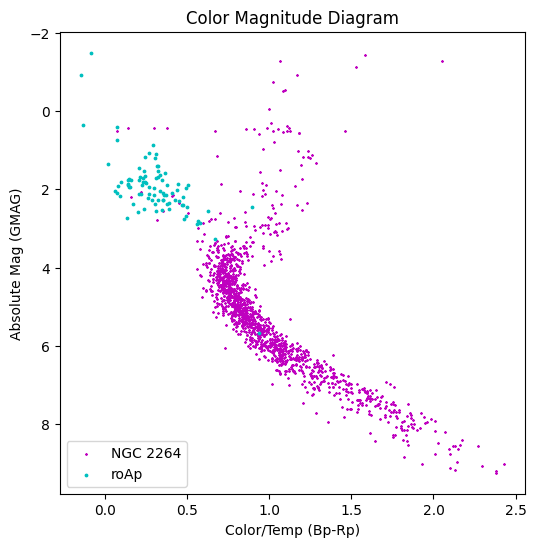

In [105]:
fig, ax = plt.subplots(1,figsize=(6,6))

plt.scatter(x=xc,y=yc,marker='*',c='m',label='NGC 2264',s=1)
plt.scatter(x=xr,y=yr,c='c',label='roAp',s=3)

plt.gca().invert_yaxis()

plt.title('Color Magnitude Diagram')
plt.ylabel('Absolute Mag (GMAG)')
plt.xlabel('Color/Temp (Bp-Rp)')
plt.legend(loc='best')
plt.savefig('Data/CMD with Error Ellipses')
plt.show()

#### 2.1 Calculating resultant vector from edge of the ellipse, given the sigma and angle of each value

In [106]:
# Making the Ellipse Equation
a1 = sig_gme
b1 = sig_bp_rp_e
theta1 = np.arctan(a1/b1)
theta1 = np.array(theta1)
yD = a1*(np.sin(theta1))
xD = b1*(np.cos(theta1))
rD = (xD**2+yD**2)**(1/2) # Resultant vector for the edge of the ellipse
print('Cluster and roAp Resultant vector\n',rd,'\n-------------------------------------------------------------------------\n',
      'Error Resultant vector\n',rD)

Cluster and roAp Resultant vector
 [[1.06386078 3.77911738 1.12490244 ... 1.98062789 1.82875882 1.87372717]
 [4.95462439 0.73028828 2.76058899 ... 1.89893033 2.00495468 5.76474957]
 [4.45158309 0.84985973 2.25533539 ... 1.39032354 1.50874364 5.26130703]
 ...
 [4.92065234 0.82187419 2.72629408 ... 1.86239487 1.9683232  5.73051127]
 [3.91159375 0.84136592 1.71413013 ... 0.86728595 1.02866537 4.72140501]
 [5.29859278 0.60315537 3.10340665 ... 2.2454172  2.3570157  6.10953294]] 
-------------------------------------------------------------------------
 Error Resultant vector
 [[0.01081118 0.00616542 0.00267466 ... 0.002659   0.002658   0.01557795]
 [0.01064034 0.00586458 0.00270161 ... 0.00264113 0.00266087 0.01546068]
 [0.01063673 0.00585985 0.00271603 ... 0.00265509 0.00267513 0.01545794]
 ...
 [0.01066823 0.00591142 0.00263857 ... 0.00258636 0.00260177 0.01548025]
 [0.01064592 0.00587101 0.00267571 ... 0.0026155  0.00263499 0.01546508]
 [0.01064564 0.00587081 0.00267751 ... 0.00261735 0

#### 2.2 Plotting single Error ellipse to show concept

<Axes.ArtistList of 1 patches>


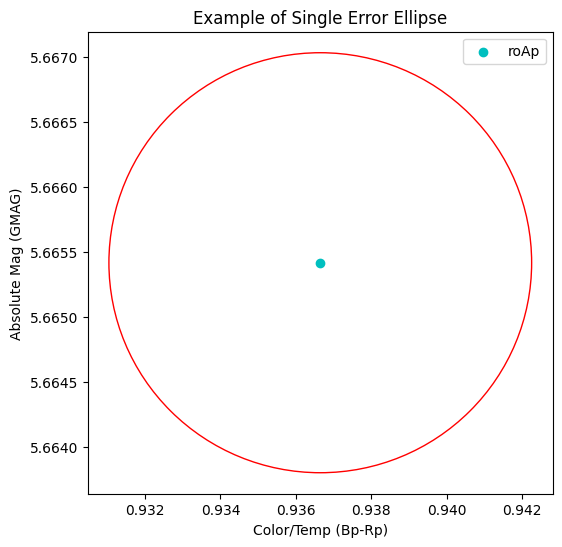

In [107]:
a0 = (a1[0][0])
b0 = (b1[0][0])
xr0 = (roAp['BP-RP0'])[0]
yr0 = (roAp['GMAG0'])[0]

fig, ax = plt.subplots(1,figsize=(6,6))

ellipse = mpatches.Ellipse(xy=(xr0,yr0),width=b0,height=a0)
ax.add_patch(ellipse)
ellipse.set_facecolor('None')
ellipse.set_edgecolor('r')
print(ax.patches)

plt.scatter(xr0,yr0,c='c',label='roAp')
plt.ylabel('Absolute Mag (GMAG)')
plt.xlabel('Color/Temp (Bp-Rp)')
plt.title('Example of Single Error Ellipse')
plt.legend(loc='best')
plt.show()

#### 2.4 Calculating $n\cdot\sigma$ tolerance ellipses with roAp and cluster sigmas

In [108]:
'''fig, ax = plt.subplots(1,figsize=(6,6))

# Making a for loop to draw an ellipse around each roAp data point
ellipse0 = []
n = 1 # User change the number of sigmas

ellipse0 = [mpatches.Ellipse(xy=((roAp['BP-RP0'])[p],(roAp['GMAG0'])[p]),width=(n*b1)[p][i],height=(n*a1)[p][i])
           for p in range(len(xr)) for i in range(len(xc))]

for e in ellipse0:
    ax.add_artist(e)
    e.set_facecolor(color='None')
    e.set_edgecolor('r')
e.set_label(f'{n}$\sigma$')

plt.scatter(x=xc,y=yc,marker='*',c='c',label='cluster array',s=1,zorder=2)
plt.scatter(x=xr,y=yr,c='black',label='roAp',s=3,zorder=3)

plt.gca().invert_yaxis()

plt.title('Color Magnitude Diagram FOV with Error Ellipses')
plt.ylabel('Absolute Mag (GMAG)')
plt.xlabel('Color/Temp (Bp-Rp)')
plt.grid(zorder=1)
plt.legend(loc='best')
plt.savefig('Data/CMD with Tolerance Ellipses')
plt.show()'''

"fig, ax = plt.subplots(1,figsize=(6,6))\n\n# Making a for loop to draw an ellipse around each roAp data point\nellipse0 = []\nn = 1 # User change the number of sigmas\n\nellipse0 = [mpatches.Ellipse(xy=((roAp['BP-RP0'])[p],(roAp['GMAG0'])[p]),width=(n*b1)[p][i],height=(n*a1)[p][i])\n           for p in range(len(xr)) for i in range(len(xc))]\n\nfor e in ellipse0:\n    ax.add_artist(e)\n    e.set_facecolor(color='None')\n    e.set_edgecolor('r')\ne.set_label(f'{n}$\\sigma$')\n\nplt.scatter(x=xc,y=yc,marker='*',c='c',label='cluster array',s=1,zorder=2)\nplt.scatter(x=xr,y=yr,c='black',label='roAp',s=3,zorder=3)\n\nplt.gca().invert_yaxis()\n\nplt.title('Color Magnitude Diagram FOV with Error Ellipses')\nplt.ylabel('Absolute Mag (GMAG)')\nplt.xlabel('Color/Temp (Bp-Rp)')\nplt.grid(zorder=1)\nplt.legend(loc='best')\nplt.savefig('Data/CMD with Tolerance Ellipses')\nplt.show()"

In [114]:
gmcet = gmce.transpose()
bp_rp_cet = bp_rp_ce.transpose()
# R squared values for Cluster and roAp mag error
cands = []
n = 10 # User change the number of sigmas
# Calculating the averages
avgx = np.mean(xr)
avgy = np.mean(yr)
# Doing vectorization to classify candidates
for q in range(len(xc)):
    for i in range(len(xr)):
        if (n*abs(rD[i][q])) >= (abs(rd[i][q])):
            cands.append({'Designation':(clust['SOURCE_ID'])[q],'GMAG':(clust['GMAG0'])[q],'GMAG_Error':(gmcet)[q],'GMAG_Sigma_Error':(n*gmcet)[q],
                        'BP-RP':(clust['BP-RP0'])[q],'BP-RP_Error':(bp_rp_cet)[q],'BP-RP_Sigma_Error':(n*bp_rp_cet)[q],'Ratio-to-Sigma':((rd)[i][q])/((rD)[i][q])})
cands = pd.DataFrame(cands)
cands.to_csv('Data/roAp_NGC2264_Candidates.txt')
cands.to_csv('Data/roAp_NGC2264_Candidates.csv')
cands.head(n=len(cands))

,Designation,GMAG,GMAG_Error,GMAG_Sigma_Error,BP-RP,BP-RP_Error,BP-RP_Sigma_Error,Ratio-to-Sigma
0,2749376138614032256,5.656689,[0.0010154092519903],[0.010154092519903],0.992255,[0.0100047990188638],[0.100047990188638],5.571562
1,2749428747668835328,2.852859,[0.0002447051197373],[0.002447051197373],0.595248,[0.00022753675218670005],[0.0022753675218670005],6.007733
2,2750678372698153216,5.582459,[0.001593019654619],[0.01593019654619],0.931294,[0.0095273831618597],[0.095273831618597],8.869630
3,2750679064188328064,5.646861,[0.0003330918083049],[0.003330918083049],0.950123,[0.0024533439356033],[0.024533439356033],5.420949
4,2750684145134171264,5.645025,[0.0006294505418684],[0.006294505418684],0.894370,[0.0041147678298858],[0.041147678298858],9.187547
5,2750815777291969280,5.660946,[0.0011491251489233],[0.011491251489233],0.947474,[0.005304268830274199],[0.05304268830274199],1.925489
6,2750837355207306240,5.724405,[0.0016515468540053],[0.016515468540053],0.963640,[0.007284165920813799],[0.07284165920813798],7.710541
7,2750842650902704512,2.544440,[0.000406002915012],[0.00406002915012],0.353918,[0.0007035514305885999],[0.0070355143058859985],9.379746
8,2750845704623790976,5.750969,[0.0017733706242878],[0.017733706242878],1.050404,[0.0221363437086422],[0.221363437086422],4.747208
9,2750857283855501440,5.762014,[0.0012245997971332],[0.012245997971331999],0.881945,[0.0120951470325021],[0.120951470325021],7.389893


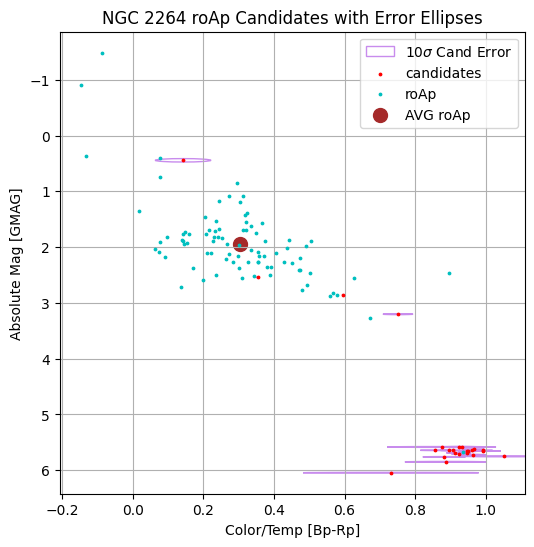

In [115]:
ub = cands['BP-RP']
ua = cands['GMAG']
xe = cands['BP-RP_Error']
ye = cands['GMAG_Error']

fig, ax = plt.subplots(1,figsize=(6,6))

ellipse0 = [mpatches.Ellipse(xy=((ub)[p],(ua)[p]),width=(n*xe)[p],height=(n*ye)[p])
           for p in range(len(ua))]
for e1 in ellipse0:
    ax.add_artist(e1)
    e1.set_facecolor(color='None')
    e1.set_edgecolor('#c88ced')
e1.set_label(f'{n}$\sigma$ Cand Error')

#plt.errorbar(ub,ua,yerr=c='red',label='Candidate',s=5,zorder=3)
plt.scatter(x=ub,y=ua,c='r',label='candidates',s=3,zorder=3)
plt.scatter(x=xr,y=yr,c='c',label='roAp',s=3,zorder=2)
plt.scatter(avgx,avgy,c='brown',s=100,label='AVG roAp',zorder=1)

plt.gca().invert_yaxis()

plt.title('NGC 2264 roAp Candidates with Error Ellipses')
plt.ylabel('Absolute Mag [GMAG]')
plt.xlabel('Color/Temp [Bp-Rp]')
plt.grid(zorder=1)
plt.legend(loc='best')
plt.savefig('Data/CMD with Cands')
plt.show()